1.0


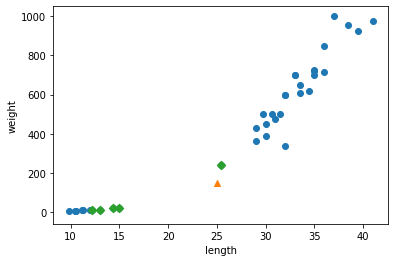

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') #Diamond : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(distances) 

#그래프 상으로 거리의 비율이 이상하다. '92'의 몇 배의 길이를 '130'이라 표현하고 있다.

### **스케일**
> 각 특성 간 값의 범위가 다르기 때문에 스케일이 다른 일은 매우 흔하다.  
거리 기반인 알고리즘을 사용할 때에는 스케일이 다르게 되면 올바르게 예측할 수 없기 때문에 직접 특성 값을 일정한 기준으로 맞춰 주어야 한다.

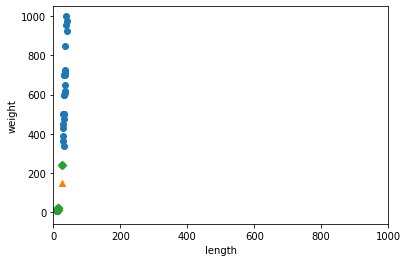

In [4]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') #Diamond : 마름모
plt.xlim((0, 1000)) #y축과 동일하게 x축도 0~1000으로 맞추어 준다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#수직으로 늘어선 형태가 나온다.
#생선의 길이(x축)는 큰 영향을 미치지 못하고, 생선의 무게(y축)만 고려 대상이 된다.

### **표준점수(z 점수)**
> 각 특성 값이 0에서 표준편차의 몇 배만큼 떨어져 있는 지를 나타낸다.  
이를 통해 실제 특성 값의 크기와 상관없이 동일한 조건으로 비교할 수 있게 된다.  

*   표준편차는 데이터가 분산된 정도를 의미한다.  
*   표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는 지를 나타내는 값이다.  
*   분산은 각 데이터에서 평균 값을 뺀 후 모두 제곱하고 난 후 평균 값이다.  
*   표준편차는 분산의 제곱근(√루트)이다 : 표준편차 = √분산  
*   표준점수는 각 데이터에서 평균 값을 뺀 후 표준편차를 나누어 주면 된다.  

### **평균과 표준편차 계산**
1. 평균 계산  
* ***mean(array, axis=n)***
> n은 0 또는 1  
>>   n이 0일 경우 : 열 방향으로 각 행의 데이터  
>>  n이 1일 경우 : 행 방향으로 각 열의 데이터  

2. 표준편차 계산
* ***std(array, axis=n)***
> n은 0 또는 1  
>>   n이 0일 경우 : 열 방향으로 각 행의 데이터  
>>  n이 1일 경우 : 행 방향으로 각 열의 데이터  

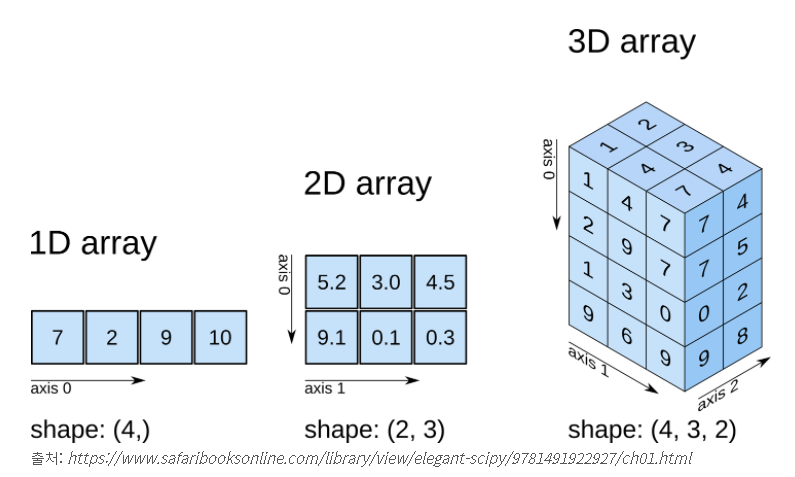

In [5]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std) #특성별 평균과 표준편차

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


### **특성별 평균 및 표준편차 계산**
> 총 36개의 샘플에서 각 2개의 특성이 있으므로 36 x 2 배열이다.  
열 방향으로 평균과 표준편차를 구하기 위해서는 axis를 0으로 주어야 한다.  
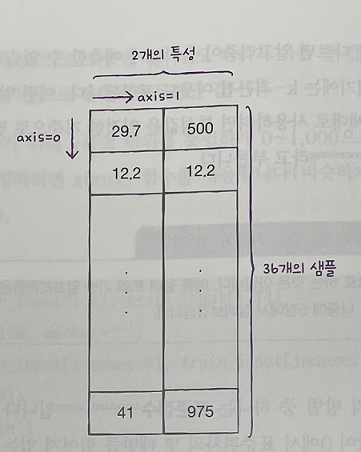

### **브로드캐스팅(broadcasting)**
> '전파'라는 뜻으로 넘파이 배열에 연산을 할 경우  
특정 조건을 만족할 때 모양이 다른 배열끼리도 연산이 가능한 것을 의미한다.

*  길이가 1인 배열은 어떤 배열에나 가능.
*  각 축이 같거나 축별로 하나의 축이 1일 경우 가능.


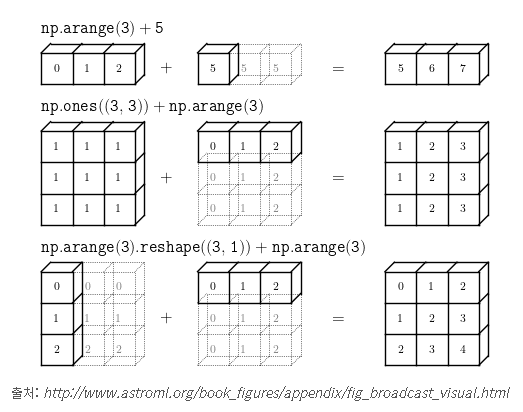

### **브로드 캐스트 예제** 
---
1. 
> ### 1 x 4  
> ### 4 x 1

In [6]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [7]:
b = a.reshape(4,1)
b

array([[0],
       [1],
       [2],
       [3]])

In [8]:
a + b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

---
2. 
> ### 1 x 4  
> ### 4 x 3

In [9]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [10]:
b = np.ones((4, 3))
b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (4,3) 

---
3. 
> ### 4 x 2 x 3  
> ###     4 x 3

In [33]:
a = np.arange(24).reshape(4, 2, 3)
b = np.arange(12).reshape(4, 3)

In [34]:
a+b

ValueError: operands could not be broadcast together with shapes (4,2,3) (4,3) 

### **샘플 데이터에서 평균을 뺀 후 표준편차로 나누어 표준 점수로 변환**

In [36]:
train_scaled = (train_input - mean) / std

### **전처리 데이터로 모델 훈련1**

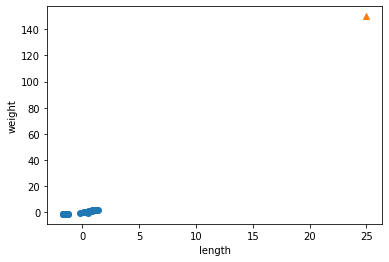

In [38]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#입력 데이터[25, 150]도 동일한 비율로 변환해야 한다.

### **입력 데이터 전처리**

In [41]:
new = ([25, 150] - mean) / std

### **전처리 데이터로 모델 훈련2**

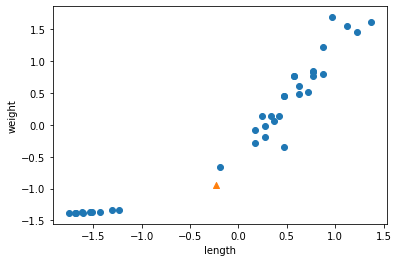

In [42]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### **테스트 데이터 전처리**

In [44]:
test_scaled = (test_input - mean) / std

### **KNN 모델 훈련**

In [45]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### **모델 평가**

In [47]:
kn.score(test_scaled, test_target)

1.0

### **입력 데이터 예측**

In [49]:
kn.predict([new])

array([1.])

### **전처리 전 산점도 출력**

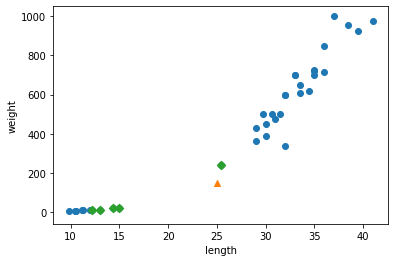

In [50]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') #Diamond : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### **전처리 후산점도 출력**

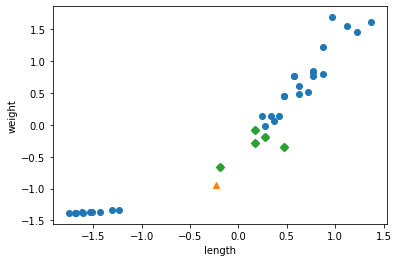

In [51]:
kn.fit(train_scaled, train_target)

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D') #Diamond : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()